# INVESTMENT RECOMMENDATION SYSTEM - STOCK PREDICTION USING LSTM

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as pdd

In [2]:
#DATA
df = pdd.DataReader("AAPL","yahoo",start="2010-01-01",end="2022-08-08")
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.434925
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.535085
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.546384
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.442256
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.430346


In [3]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-07-14,148.949997,143.250000,144.080002,148.470001,78140700.0,148.470001
2022-07-15,150.860001,148.199997,149.779999,150.169998,76030800.0,150.169998
2022-07-18,151.570007,146.699997,150.740005,147.070007,81420900.0,147.070007
2022-07-19,151.229996,146.910004,147.919998,151.000000,82982400.0,151.000000
2022-07-20,153.720001,150.369995,151.119995,153.039993,64759500.0,153.039993


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3159 entries, 2009-12-31 to 2022-07-20
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       3159 non-null   float64
 1   Low        3159 non-null   float64
 2   Open       3159 non-null   float64
 3   Close      3159 non-null   float64
 4   Volume     3159 non-null   float64
 5   Adj Close  3159 non-null   float64
dtypes: float64(6)
memory usage: 172.8 KB


In [5]:
df.isnull().any()

High         False
Low          False
Open         False
Close        False
Volume       False
Adj Close    False
dtype: bool

In [6]:
df.isnull().sum()

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [7]:
df.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [8]:
df.describe()

,High,Low,Open,Close,Volume,Adj Close
count,3159.000000,3159.000000,3159.000000,3159.000000,3.159000e+03,3159.000000
mean,48.228177,47.193571,47.705298,47.731873,2.625843e+08,45.960447
std,44.706899,43.602679,44.142162,44.179637,2.239575e+08,44.694982
min,7.000000,6.794643,6.870357,6.858929,4.100000e+07,5.864508
25%,18.928036,18.593750,18.750000,18.759999,1.054498e+08,16.457102
50%,29.299999,28.822500,29.080000,29.027500,1.757532e+08,26.777472
75%,52.986250,51.877501,52.465000,52.358749,3.562650e+08,51.144835
max,182.940002,179.119995,182.630005,182.009995,1.880998e+09,181.511703


In [9]:
df=df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.434925
1,2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.535085
2,2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.546384
3,2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.442256
4,2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.430346


In [10]:
df=df.drop(['Adj Close'],axis=1)
df.head()

,Date,High,Low,Open,Close,Volume
0,2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0
1,2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0
2,2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0
3,2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0
4,2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0


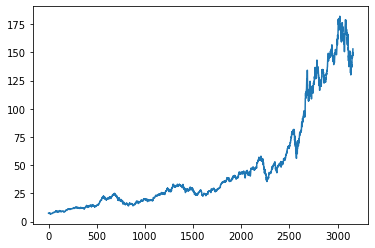

In [11]:
plt.plot(df.Close)

In [12]:
df

,Date,High,Low,Open,Close,Volume
0,2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0
1,2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0
2,2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0
3,2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0
4,2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0
...,...,...,...,...,...,...
3154,2022-07-14,148.949997,143.250000,144.080002,148.470001,78140700.0
3155,2022-07-15,150.860001,148.199997,149.779999,150.169998,76030800.0
3156,2022-07-18,151.570007,146.699997,150.740005,147.070007,81420900.0
3157,2022-07-19,151.229996,146.910004,147.919998,151.000000,82982400.0


In [13]:
ma100=df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3154    154.772601
3155    154.601301
3156    154.428801
3157    154.338100
3158    154.241100
Name: Close, Length: 3159, dtype: float64

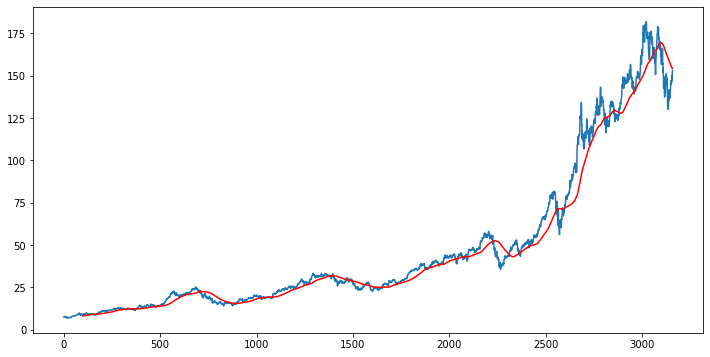

In [14]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [15]:
ma200=df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3154    158.28735
3155    158.32865
3156    158.34985
3157    158.39735
3158    158.44930
Name: Close, Length: 3159, dtype: float64

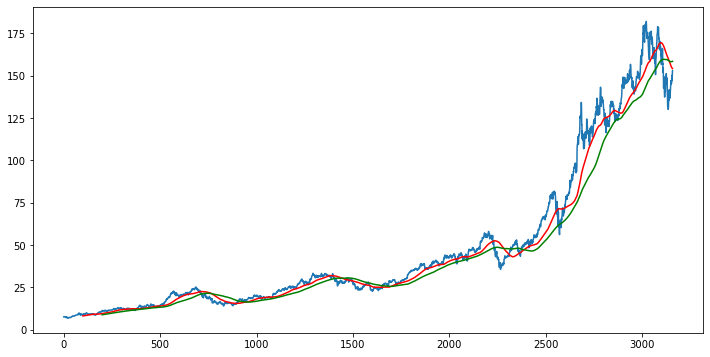

In [16]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [17]:
df.shape

(3159, 6)

In [18]:
#Splitting Data into Training and Testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(2211, 1)
(948, 1)


In [19]:
data_training.head()

,Close
0,7.526071
1,7.643214
2,7.656429
3,7.534643
4,7.520714


In [20]:
data_testing.head()

,Close
2211,55.527500
2212,54.340000
2213,55.537498
2214,55.297501
2215,54.005001


In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))


In [22]:

data_training_array = scaler.fit_transform(data_training)
data_training_array
                    

array([[0.01304067],
       [0.01533047],
       [0.01558878],
       ...,
       [0.97458875],
       [0.92322887],
       [0.91389512]])

In [23]:
data_training_array.shape

(2211, 1)

In [24]:
x_train=[]
y_train=[]

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
    
x_train,y_train=np.array(x_train),np.array(y_train)

In [25]:
x_train.shape

(2111, 100, 1)

# LSTM MODEL

In [26]:

from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential


In [27]:
model=Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True,
            input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [28]:
 model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [29]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
66/66 [==============================] - 18s 200ms/step - loss: 0.0298
Epoch 2/50
66/66 [==============================] - 12s 175ms/step - loss: 0.0068
Epoch 3/50
66/66 [==============================] - 13s 195ms/step - loss: 0.0050
Epoch 4/50
66/66 [==============================] - 13s 191ms/step - loss: 0.0048
Epoch 5/50
66/66 [==============================] - 12s 187ms/step - loss: 0.0047
Epoch 6/50
66/66 [==============================] - 12s 186ms/step - loss: 0.0037
Epoch 7/50
66/66 [==============================] - 12s 186ms/step - loss: 0.0038
Epoch 8/50
66/66 [==============================] - 12s 186ms/step - loss: 0.0039
Epoch 9/50
66/66 [==============================] - 12s 187ms/step - loss: 0.0033
Epoch 10/50
66/66 [==============================] - 12s 187ms/step - loss: 0.0030
Epoch 11/50
66/66 [==============================] - 12s 186ms/step - loss: 0.0034
Epoch 12/50
66/66 [==============================] - 12s 186ms/step - loss: 0.0033
Epoch 13/50
6

In [30]:
model.save('keras_model.h5')

In [31]:
data_testing.head()

,Close
2211,55.527500
2212,54.340000
2213,55.537498
2214,55.297501
2215,54.005001


In [32]:
data_training.tail(100)

,Close
2111,46.790001
2112,47.090000
2113,47.037498
2114,47.145000
2115,46.974998
...,...
2206,56.072498
2207,55.942501
2208,56.717499
2209,54.090000


In [33]:
past_100_days=data_training.tail(100)


In [34]:
final_df=past_100_days.append(data_testing,ignore_index=True)


In [35]:
final_df.head()

,Close
0,46.790001
1,47.090000
2,47.037498
3,47.145000
4,46.974998


In [36]:
input_data =  scaler.fit_transform(final_df)


In [37]:
input_data

array([[0.07676027],
       [0.07880857],
       [0.0784501 ],
       ...,
       [0.76144072],
       [0.78827348],
       [0.80220191]])

In [38]:
input_data.shape

(1048, 1)

In [39]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [40]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(948, 100, 1)
(948,)


In [41]:
#Predictions

y_predicted = model.predict(x_test)

In [42]:
y_predicted.shape

(948, 1)

In [43]:
y_test

array([0.13641717, 0.1283093 , 0.13648544, 0.13484681, 0.12602203,
       0.13163779, 0.13392506, 0.13747546, 0.12443458, 0.13247419,
       0.12649996, 0.11956987, 0.1213792 , 0.13086968, 0.13660494,
       0.1114449 , 0.10139113, 0.10511224, 0.115661  , 0.11316891,
       0.10630708, 0.08872578, 0.08541435, 0.07614578, 0.08401469,
       0.08763335, 0.07454126, 0.05938379, 0.05904241, 0.05137833,
       0.05535546, 0.05470684, 0.06614321, 0.06377059, 0.06211488,
       0.07276608, 0.0588888 , 0.05552616, 0.04489204, 0.04678673,
       0.04513101, 0.04593327, 0.04909106, 0.03975419, 0.03712555,
       0.0407613 , 0.03191943, 0.02498933, 0.0145771 , 0.00792012,
       0.02556968, 0.02382861, 0.02396517, 0.02654264, 0.02684987,
       0.        , 0.010361  , 0.00979771, 0.01461125, 0.01898096,
       0.01981736, 0.01723989, 0.01333105, 0.01857132, 0.02176325,
       0.02333362, 0.02497227, 0.0189639 , 0.02002218, 0.01793974,
       0.02657676, 0.02408467, 0.02131943, 0.03936161, 0.04139

In [44]:
y_predicted

array([[0.19940482],
       [0.19969884],
       [0.1997938 ],
       [0.19970933],
       [0.19947697],
       [0.19910772],
       [0.19862871],
       [0.19807914],
       [0.19751127],
       [0.19692937],
       [0.19635168],
       [0.19577801],
       [0.19518512],
       [0.19455616],
       [0.19391368],
       [0.19330953],
       [0.19271532],
       [0.19206738],
       [0.19131821],
       [0.19046769],
       [0.18953046],
       [0.18851325],
       [0.18738705],
       [0.18611939],
       [0.1846775 ],
       [0.18306455],
       [0.18131435],
       [0.17944537],
       [0.17744884],
       [0.17532331],
       [0.17306758],
       [0.17070392],
       [0.16826782],
       [0.16582853],
       [0.16345088],
       [0.16118395],
       [0.15909117],
       [0.15718514],
       [0.15545112],
       [0.15384622],
       [0.15233544],
       [0.15089017],
       [0.14949584],
       [0.1481611 ],
       [0.14687811],
       [0.14562522],
       [0.14440244],
       [0.143

In [45]:
scaler.scale_

array([0.00682769])

In [46]:
scale_factor = 1/0.02099517
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

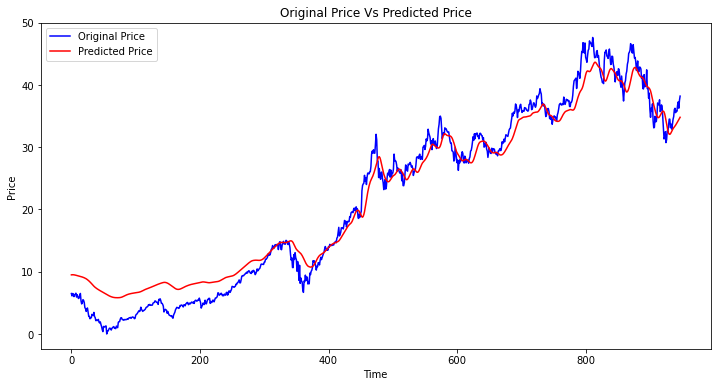

In [47]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label='Original Price')
plt.plot(y_predicted, 'r', label='Predicted Price')
plt.title("Original Price Vs Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

# EVALUATION METRICS

In [48]:
rmse=np.sqrt(np.mean(y_predicted - y_test)**2)
print('Root Mean Square Error: {:.4f}'.format(rmse))

Root Mean Square Error: 0.4828


In [49]:
meanse=np.mean(y_predicted - y_test)**2
print('Mean Squared Error: {:.4f}'.format(meanse))

Mean Squared Error: 0.2331


In [50]:
meanabse=np.abs(y_predicted - y_test).mean()
print('Mean Absolute Error: {:.4f}'.format(meanabse))

Mean Absolute Error: 15.3863


In [53]:
meanabspere=np.abs(y_predicted - y_test).mean()*100
print('Mean Absolute Percentage Error: {:.4f}'.format(meanabspere))

Mean Absolute Percentage Error: 1538.6294


In [52]:
from sklearn.metrics import r2_score
rsc=r2_score(y_test,y_predicted)
print('R-squared: {:.4f}'.format(rsc))

R-squared: 0.9660
